In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# !ls ~/simnet/ -lar | grep -i "Jun 12"
!ls ~/simnet/

 download_Dump			 results_18_apr
'download.php?submit=Download'	 results_18th_Mar
 examples			 results_1st_apr
 freiburg_groceries_dataset	 results2
 f_vs_x_0.png			 results_31st_Mar
 f_vs_x.png			 results_f_12_jun
 images				 results_f_tanh_13_jun
 kd_tree			 results_fxx_12_jun
 ldc				 results_fxx_tanh_12_jun
 ldca				 results_sin
 modulus8888.sh			 results_sin_2
 Modulus_examples.tar.gz	 results_uniform
 results			 taylor
 results1			 wget-log
 results_12_jun


k 1000
g 3000
r 5000
c 8000
m 12000
#EE5007 18000


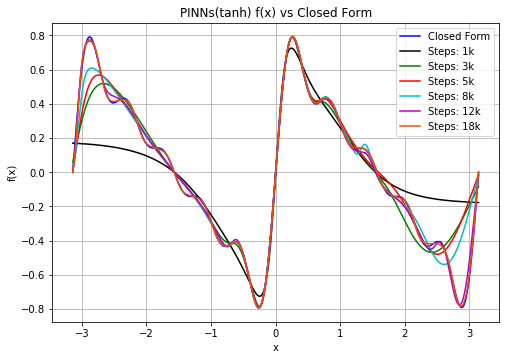

In [102]:
#steps = ['25000', '50000', '75000', '100000', '125000']
steps = ['1000', '3000', '5000', '8000', '12000', '18000']
legend = ['Closed Form', 'Steps: 1k', 'Steps: 3k', 'Steps: 5k', 'Steps: 8k', 'Steps: 12k', 'Steps: 18k']

colors = ['k', 'g', 'r', 'c', 'm', '#EE5007']

x_c = np.linspace(-np.pi, np.pi, 1000)
y_c = (1/120)*(60*np.sin(2*x_c) + 30*np.sin(4*x_c) + 20*np.sin(6*x_c) + 15*np.sin(8*x_c) + 12*np.sin(10*x_c))
plt.plot(x_c, y_c, '-b')

for color, step in zip(colors, steps):
    print(color, step)
    npz_file = np.load(f'simnet/results_f_tanh_13_jun/results/sine_checkpoint_results_{step}/inference_domain/results/Inference.npz', allow_pickle=True)
    # print(npz_file.files)
    data = npz_file['arr_0'].tolist()
    f = data['f'].flatten()
    x = data['x'].flatten()
    # sort [f, x] by f
    sorted_f_x = sorted(zip(x, f), key=lambda x: x[0])
     
    x = [x for x, y in sorted_f_x]
    y = [y for x, y in sorted_f_x]

    plt.plot(x,y, f'-', color=color, label=f'{step} steps')
    plt.legend(legend, loc='best')

    # For the original closed form solution

plt.rcParams["figure.figsize"] = (8,5.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'PINNs(tanh) f(x) vs Closed Form')
plt.grid(True)
plt.savefig('image_res/f_tanh.png')
plt.show()
    

In [3]:
# load numpy npz file
npz_file = np.load('simnet/results/sine_checkpoint_results_1000/inference_domain/results/Inference.npz', allow_pickle=True)
npz_file.files

['arr_0']

In [4]:
data = npz_file['arr_0'].tolist()
data['f']

array([[-2.8809538 ],
       [ 2.8404152 ],
       [-0.5827673 ],
       ...,
       [ 0.04756053],
       [ 2.8235445 ],
       [ 0.10659415]], dtype=float32)

In [5]:
f = data['f'].flatten()
x = data['x'].flatten()
# sort [f, x] by f
sorted_f_x = sorted(zip(x, f), key=lambda x: x[0]) 

In [6]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 10000
x = [x for x, y in sorted_f_x]
y = [y for x, y in sorted_f_x]

# For the original closed form solution
x_c = np.linspace(-np.pi, np.pi, 628318)
y_c = (1/120)*(60*np.sin(2*x_c) + 30*np.sin(4*x_c) + 20*np.sin(6*x_c) + 15*np.sin(8*x_c) + 12*np.sin(10*x_c))

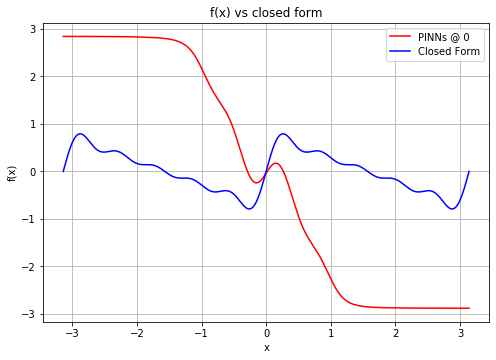

In [7]:
# plot line graph x vs y and x_c vs y_c using matplotlib.
plt.rcParams["figure.figsize"] = (8,5.5)
plt.plot(x,y, '-r')
plt.plot(x_c, y_c, '-b')
plt.legend(["PINNs @ 0", "Closed Form"], loc ="best")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f''(x) vs closed form')
plt.grid(True)
plt.savefig('images/f_vs_x_3000.png')
plt.show()

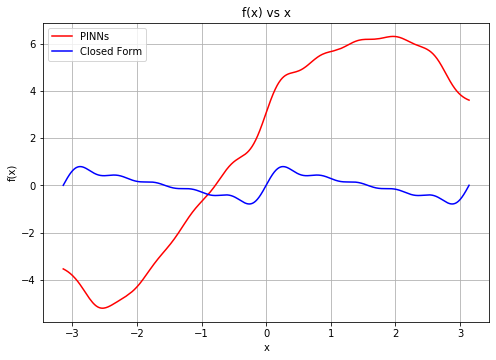

In [114]:
# plot line graph data['f'] vs data['x'] using matplotlib.
plt.plot(x,y, '-r')
plt.plot(x_c, y_c, '-b')
plt.legend(["PINNs", "Closed Form"], loc ="best")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) vs x')
plt.grid(True)
plt.savefig('images/f_vs_x_3000.png')
plt.show()

In [424]:
for step in range(0, 28500, 1000):
    act_fcn = 'swish'
    npz_file = np.load(f'simnet/results/sine_checkpoint_results_{step}/inference_domain/results/Inference.npz', allow_pickle=True)
    # npz_file = np.load(f'simnet/results_12_jun/results/sine_checkpoint_results_{step}/inference_domain/results/Inference.npz', allow_pickle=True)
    data = npz_file['arr_0'].tolist()
    f = data['f'].flatten()
    x = data['x'].flatten()
    # sort [f, x] by f
    sorted_f_x = sorted(zip(x, f), key=lambda x: x[0])
    # import matplotlib as mpl
    # mpl.rcParams['agg.path.chunksize'] = 10000
    x = [x for x, y in sorted_f_x]
    y = [y for x, y in sorted_f_x]

    # For the original closed form solution
    x_c = np.linspace(-np.pi, np.pi, 628318)
    y_c = (1/120)*(60*np.sin(2*x_c) + 30*np.sin(4*x_c) + 20*np.sin(6*x_c) + 15*np.sin(8*x_c) + 12*np.sin(10*x_c))
    # plot line graph x vs y and x_c vs y_c using matplotlib.
    plt.rcParams["figure.figsize"] = (8,5.5)
    plt.plot(x,y, '-r')
    plt.plot(x_c, y_c, '-b')
    plt.legend([f"PINNs", "Closed Form"], loc ="best")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    mse_y = np.mean((y - y_c)**2)

    plt.title(f'PINNs({act_fcn}) f\'(x) vs Closed Form, MSE = {mse_y:.2e}, Steps = {step//1000}k')
    plt.grid(True)
    plt.savefig(f'image_res/f_vs_x_diff1_{step}.png')
    # clear figure
    plt.clf()
    # plt.show()

<Figure size 576x396 with 0 Axes>

In [438]:
x_c = np.linspace(-np.pi, np.pi, 628318)
y_c = (1/120)*(60*np.sin(2*x_c) + 30*np.sin(4*x_c) + 20*np.sin(6*x_c) + 15*np.sin(8*x_c) + 12*np.sin(10*x_c))
# Percentage error between x,y and x_c,y_c
percentage_error = np.mean((y - y_c)/y_c) * 100
mse_y = np.mean((y - y_c)**2)
print(f'MSE error between PINNs and Closed form: {mse_y}')
# MAPE error between y and y_c
mape_y = np.mean(np.abs((y - y_c)/y_c))
print(f'MAPE error between PINNs and Closed form: {mape_y}')

MSE error between PINNs and Closed form: 3.32596392057863e-05


In [530]:
!ls simnet/results


sine_checkpoint_results_0      sine_checkpoint_results_19000
sine_checkpoint_results_1000   sine_checkpoint_results_2000
sine_checkpoint_results_10000  sine_checkpoint_results_20000
sine_checkpoint_results_11000  sine_checkpoint_results_21000
sine_checkpoint_results_12000  sine_checkpoint_results_3000
sine_checkpoint_results_13000  sine_checkpoint_results_4000
sine_checkpoint_results_14000  sine_checkpoint_results_5000
sine_checkpoint_results_15000  sine_checkpoint_results_6000
sine_checkpoint_results_16000  sine_checkpoint_results_7000
sine_checkpoint_results_17000  sine_checkpoint_results_8000
sine_checkpoint_results_18000  sine_checkpoint_results_9000


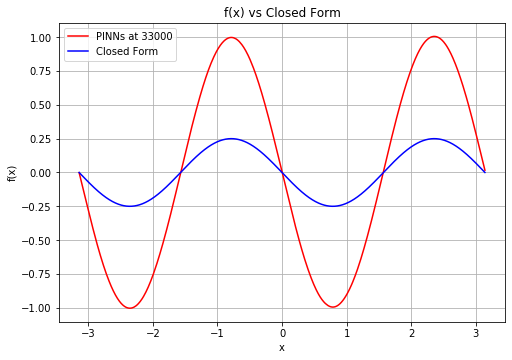

In [59]:
import numpy as np
import matplotlib.pyplot as plt
step = 33000

npz_file = np.load(f'simnet/results/sine_checkpoint_results_{step}/inference_domain/results/Inference.npz', allow_pickle=True)
data = npz_file['arr_0'].tolist()
f = data['f'].flatten()
x = data['x'].flatten()
# sort [f, x] by f
sorted_f_x = sorted(zip(x, f), key=lambda x: x[0]) 
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 10000
x = [x for x, y in sorted_f_x]
y = [y for x, y in sorted_f_x]

# For the original closed form solution
x_c = np.linspace(-np.pi, np.pi, 628318)
y_c = -np.sin(2*x_c)/4 # (np.sin(2*x_c))/2 + (np.sin(4*x_c))/4 + (np.sin(6*x_c))/6 + (np.sin(8*x_c))/8 + (np.sin(10*x_c))/10

# plot line graph x vs y and x_c vs y_c using matplotlib.
plt.rcParams["figure.figsize"] = (8,5.5)
plt.plot(x,y, '-r')
plt.plot(x_c, y_c, '-b')
plt.legend([f"PINNs at {step}", "Closed Form"], loc ="best")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) vs Closed Form')
plt.grid(True)
plt.savefig('images/f_vs_x_3000.png')
plt.show()
